In [2]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import matplotlib as plt
import requests
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
print('Libraries imported.')

Libraries imported.


In [1]:
#Download the URL from wikipedia page
url  = "https://github.com/Ekdeep0712/github-example/blob/master/Qsys_Resolutions.csv"
page = requests.get(url)
if page.status_code == 200:
    print('URL downloaded successfully')
else:
    print('ERROR in Downloading. Error code: {}'.format(page.status_code))

NameError: name 'requests' is not defined

In [3]:
df_qsys = pd.read_html(url, header=0, na_values = ['Not assigned'])[0]
df_qsys.head()

,Unnamed: 0,Incident ID*+,Summary*,Priority*,First Name+,Last Name+,Date of Occurrence+,Status*,Status Reason,Target Date,Assigned Group*+,Assignee+,Owner Group+,Owner,Environment+,Resolution,Notes
0,NaN,INC000001045622,§AAF2U5B,3-Medium,Michael,Hillinger,25.06.2019 09:49:51,Closed,NaN,02.07.2019 09:49:44,6350_BATCH,Charles Lucas Pinto Raul,6350_BATCH,Charles Lucas Pinto Raul,QSYS,No further action necessary. Job restarted by ...,"ABEND CODE 0001 P3 (000,006,031); (Jobname=§AA..."
1,NaN,INC000001045610,§ZAF2U5B,3-Medium,Michael,Hillinger,25.06.2019 09:30:24,Closed,NaN,02.07.2019 09:30:24,6350_BATCH,Nemanja Stojkovic,6350_BATCH,Nemanja Stojkovic,QSYS,No further action necessary. Job restarted by ...,"ABEND CODE 0001 P3 (000,006,031); (Jobname=§ZA..."
2,NaN,INC000001045454,§ZAF2U5B,3-Medium,Michael,Hillinger,24.06.2019 23:52:59,Closed,NaN,01.07.2019 16:29:51,6350_BATCH,Nemanja Stojkovic,6350_BATCH,Nemanja Stojkovic,QSYS,No further action necessary. Job restarted by ...,"ABEND CODE 0001 P3 (000,006,031); (Jobname=§ZA..."
3,NaN,INC000001045435,§AAF2U5B,3-Medium,Michael,Hillinger,24.06.2019 21:15:03,Closed,NaN,01.07.2019 16:29:51,6350_BATCH,Nemanja Stojkovic,6350_BATCH,Nemanja Stojkovic,QSYS,No further action necessary. Job restarted by ...,"ABEND CODE 0001 P3 (000,006,031); (Jobname=§AA..."
4,NaN,INC000001045431,§ZACB26F,3-Medium,Alexander,Matejka,24.06.2019 20:16:46,Closed,NaN,01.07.2019 16:29:51,6350_BATCH,Tomas Uher,6350_BATCH,Tomas Uher,QSYS,"job restart successful, no further action requ...","INVALID CC 0008 P2 (000,149,117); (Jobname=§ZA..."


In [4]:
df_qsys = df_qsys.drop(["Unnamed: 0", "Incident ID*+", "Priority*", "First Name+", "Last Name+", "Status*", "Status Reason", "Target Date", "Assigned Group*+", "Assignee+", "Owner Group+", "Owner"], axis=1) 
df_qsys.head()

,Summary*,Date of Occurrence+,Environment+,Resolution,Notes
0,§AAF2U5B,25.06.2019 09:49:51,QSYS,No further action necessary. Job restarted by ...,"ABEND CODE 0001 P3 (000,006,031); (Jobname=§AA..."
1,§ZAF2U5B,25.06.2019 09:30:24,QSYS,No further action necessary. Job restarted by ...,"ABEND CODE 0001 P3 (000,006,031); (Jobname=§ZA..."
2,§ZAF2U5B,24.06.2019 23:52:59,QSYS,No further action necessary. Job restarted by ...,"ABEND CODE 0001 P3 (000,006,031); (Jobname=§ZA..."
3,§AAF2U5B,24.06.2019 21:15:03,QSYS,No further action necessary. Job restarted by ...,"ABEND CODE 0001 P3 (000,006,031); (Jobname=§AA..."
4,§ZACB26F,24.06.2019 20:16:46,QSYS,"job restart successful, no further action requ...","INVALID CC 0008 P2 (000,149,117); (Jobname=§ZA..."


In [5]:
df_qsys = df_qsys.rename(columns={'Summary*': 'Jobs', 'Date of Occurrence+': 'Date' , 'Environment+': 'Environment'})
df_qsys.head()

,Jobs,Date,Environment,Resolution,Notes
0,§AAF2U5B,25.06.2019 09:49:51,QSYS,No further action necessary. Job restarted by ...,"ABEND CODE 0001 P3 (000,006,031); (Jobname=§AA..."
1,§ZAF2U5B,25.06.2019 09:30:24,QSYS,No further action necessary. Job restarted by ...,"ABEND CODE 0001 P3 (000,006,031); (Jobname=§ZA..."
2,§ZAF2U5B,24.06.2019 23:52:59,QSYS,No further action necessary. Job restarted by ...,"ABEND CODE 0001 P3 (000,006,031); (Jobname=§ZA..."
3,§AAF2U5B,24.06.2019 21:15:03,QSYS,No further action necessary. Job restarted by ...,"ABEND CODE 0001 P3 (000,006,031); (Jobname=§AA..."
4,§ZACB26F,24.06.2019 20:16:46,QSYS,"job restart successful, no further action requ...","INVALID CC 0008 P2 (000,149,117); (Jobname=§ZA..."


In [6]:
df_qsys["Notes"]= df_qsys["Notes"].str.split("P", n = 1, expand = True)
df_qsys.head()

,Jobs,Date,Environment,Resolution,Notes
0,§AAF2U5B,25.06.2019 09:49:51,QSYS,No further action necessary. Job restarted by ...,ABEND CODE 0001
1,§ZAF2U5B,25.06.2019 09:30:24,QSYS,No further action necessary. Job restarted by ...,ABEND CODE 0001
2,§ZAF2U5B,24.06.2019 23:52:59,QSYS,No further action necessary. Job restarted by ...,ABEND CODE 0001
3,§AAF2U5B,24.06.2019 21:15:03,QSYS,No further action necessary. Job restarted by ...,ABEND CODE 0001
4,§ZACB26F,24.06.2019 20:16:46,QSYS,"job restart successful, no further action requ...",INVALID CC 0008


In [7]:
df_qsys["Notes"]= df_qsys["Notes"].str.split(";", n = 1, expand = True)
df_qsys.head()

,Jobs,Date,Environment,Resolution,Notes
0,§AAF2U5B,25.06.2019 09:49:51,QSYS,No further action necessary. Job restarted by ...,ABEND CODE 0001
1,§ZAF2U5B,25.06.2019 09:30:24,QSYS,No further action necessary. Job restarted by ...,ABEND CODE 0001
2,§ZAF2U5B,24.06.2019 23:52:59,QSYS,No further action necessary. Job restarted by ...,ABEND CODE 0001
3,§AAF2U5B,24.06.2019 21:15:03,QSYS,No further action necessary. Job restarted by ...,ABEND CODE 0001
4,§ZACB26F,24.06.2019 20:16:46,QSYS,"job restart successful, no further action requ...",INVALID CC 0008


In [8]:
new = df_qsys["Date"]= df_qsys["Date"].str.split(" ", n = 1, expand = True)
df_qsys["Date"]= new[0] 
  
# making separate last name column from new data frame 
df_qsys["Time"]= new[1] 
  
# df display 
df_qsys

,Jobs,Date,Environment,Resolution,Notes,Time
0,§AAF2U5B,25.06.2019,QSYS,No further action necessary. Job restarted by ...,ABEND CODE 0001,09:49:51
1,§ZAF2U5B,25.06.2019,QSYS,No further action necessary. Job restarted by ...,ABEND CODE 0001,09:30:24
2,§ZAF2U5B,24.06.2019,QSYS,No further action necessary. Job restarted by ...,ABEND CODE 0001,23:52:59
3,§AAF2U5B,24.06.2019,QSYS,No further action necessary. Job restarted by ...,ABEND CODE 0001,21:15:03
4,§ZACB26F,24.06.2019,QSYS,"job restart successful, no further action requ...",INVALID CC 0008,20:16:46
5,§ZAGEZBB,24.06.2019,QSYS,Job resolved by jobowner > jobrestart > no act...,INVALID CC 0008,12:49:14
6,§ZCJAZML,24.06.2019,QSYS,Please set this job to OK,INVALID CC 0008,10:59:08
7,§ZALP35T,24.06.2019,QSYS,resolved by jobowner > job restart > no action...,ABEND CODE 0012,13:26:24
8,§ZALP35S,24.06.2019,QSYS,Resolved by jobowner > job restart > no action...,ABEND CODE 0012,13:25:14
9,AZCZBA1A,24.06.2019,QSYS,please set job to complete,INVALID CC 0127,11:50:07


In [9]:
df_new = df_qsys[['Jobs','Environment','Date', 'Time', 'Notes', 'Resolution']]
df_new = df_new.rename(columns={'Notes': 'Abend_Codes'})
df_new.head()

,Jobs,Environment,Date,Time,Abend_Codes,Resolution
0,§AAF2U5B,QSYS,25.06.2019,09:49:51,ABEND CODE 0001,No further action necessary. Job restarted by ...
1,§ZAF2U5B,QSYS,25.06.2019,09:30:24,ABEND CODE 0001,No further action necessary. Job restarted by ...
2,§ZAF2U5B,QSYS,24.06.2019,23:52:59,ABEND CODE 0001,No further action necessary. Job restarted by ...
3,§AAF2U5B,QSYS,24.06.2019,21:15:03,ABEND CODE 0001,No further action necessary. Job restarted by ...
4,§ZACB26F,QSYS,24.06.2019,20:16:46,INVALID CC 0008,"job restart successful, no further action requ..."


In [10]:
df_jobs = df_new.groupby('Jobs').count()
df_jobs

,Environment,Date,Time,Abend_Codes,Resolution
Jobs,,,,,
AACJASEC,3,3,3,3,3
AACJASED,2,2,2,2,2
AACJAUME,1,1,1,1,1
ACCJASEC,2,2,2,2,2
ACCJASED,1,1,1,1,1
ACCJAUMC,2,2,2,2,2
ACCJAUME,1,1,1,1,1
AZAC660E,2,2,2,2,2
AZACDF2J,1,1,1,1,1


In [11]:
df_sort = df_jobs.sort_values(by='Resolution', ascending=False)
df_sort

,Environment,Date,Time,Abend_Codes,Resolution
Jobs,,,,,
§CAAUL0C,16,16,16,16,16
AZD2IGDR,10,10,10,10,10
§ZAB859B,10,10,10,10,10
§ZCZB14B,10,10,10,10,10
§ZACD80A,9,9,9,9,9
AZC6CCBB,9,9,9,9,9
AZCJASCQ,9,9,9,9,9
AZCJAWPY,8,8,8,8,8
AZD2I24A,8,8,8,8,8


In [12]:
df_top = df_sort.head(20)
df_top

,Environment,Date,Time,Abend_Codes,Resolution
Jobs,,,,,
§CAAUL0C,16,16,16,16,16
AZD2IGDR,10,10,10,10,10
§ZAB859B,10,10,10,10,10
§ZCZB14B,10,10,10,10,10
§ZACD80A,9,9,9,9,9
AZC6CCBB,9,9,9,9,9
AZCJASCQ,9,9,9,9,9
AZCJAWPY,8,8,8,8,8
AZD2I24A,8,8,8,8,8


In [13]:
df_top = df_top.filter(['Jobs','Resolution'], axis=1)
df_top

,Resolution
Jobs,
§CAAUL0C,16
AZD2IGDR,10
§ZAB859B,10
§ZCZB14B,10
§ZACD80A,9
AZC6CCBB,9
AZCJASCQ,9
AZCJAWPY,8
AZD2I24A,8


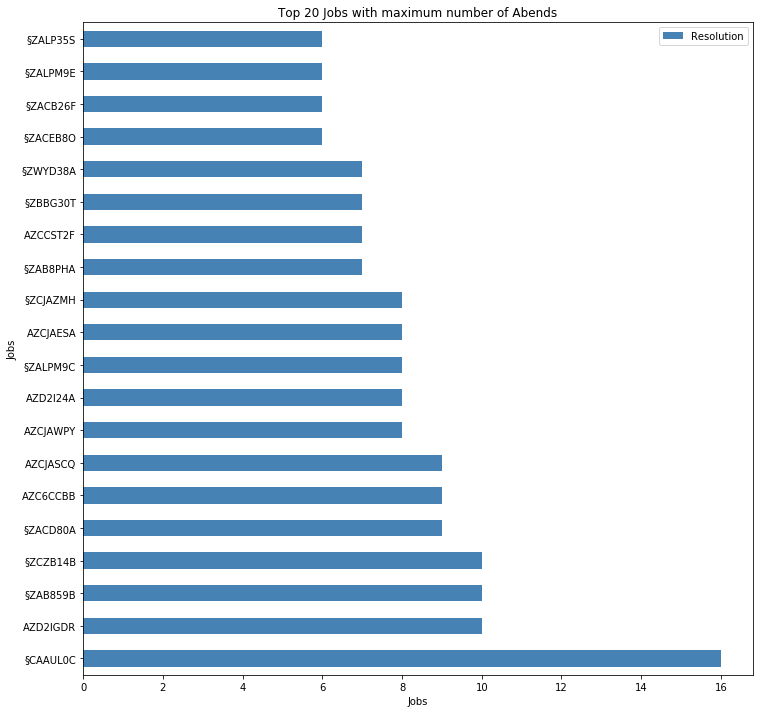

In [15]:
import numpy as np
import matplotlib.pyplot as plt

df_top.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Jobs')
plt.title('Top 20 Jobs with maximum number of Abends')

plt.show()


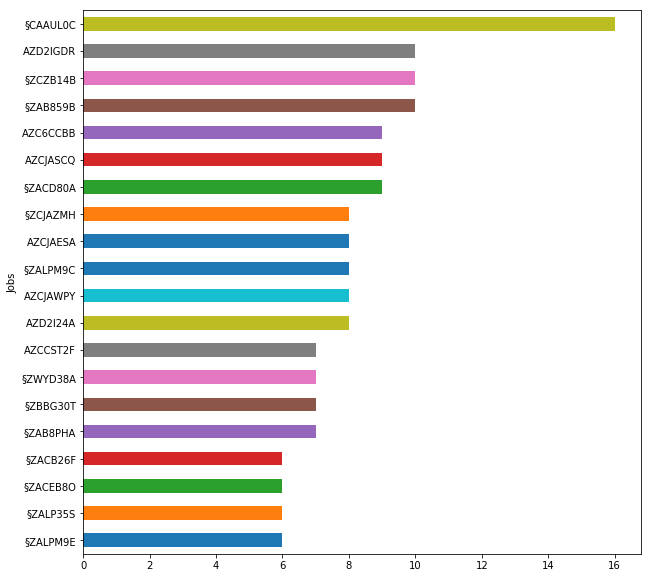

In [16]:
x = df_top.groupby('Jobs')['Resolution'].mean().sort_values().tail(20)
x.plot(kind='barh', figsize=(10, 10))

In [17]:
df_first = df_new[df_new['Jobs']=='§CAAUL0C']
df_first

,Jobs,Environment,Date,Time,Abend_Codes,Resolution
759,§CAAUL0C,QSYS,14.02.2019,22:23:56,INVALID CONDITION-CODE 0128,Please set job ok. Thanks Martin
760,§CAAUL0C,QSYS,14.02.2019,20:20:55,INVALID CONDITION-CODE 0128,Please set Job OK. Thanks MArtin
765,§CAAUL0C,QSYS,14.02.2019,08:52:52,INVALID CONDITION-CODE 0128,Please set Job ok. Thanks Martin
770,§CAAUL0C,QSYS,14.02.2019,08:47:23,INVALID CONDITION-CODE 0128,Please set Job Ok. Thanks Martin
772,§CAAUL0C,QSYS,13.02.2019,17:11:25,INVALID CONDITION-CODE 0128,Please set Job OK! Thanks Martin
773,§CAAUL0C,QSYS,13.02.2019,16:46:25,INVALID CONDITION-CODE 0128,Please set Job OK! Thanks Martin
774,§CAAUL0C,QSYS,13.02.2019,16:34:12,INVALID CONDITION-CODE 0128,Please set Job to OK. Thanks Martin
775,§CAAUL0C,QSYS,13.02.2019,16:22:00,INVALID CONDITION-CODE 0128,Please set Job to OK. Thanks Martin
778,§CAAUL0C,QSYS,13.02.2019,20:40:54,INVALID CONDITION-CODE 0128,Please set Job OK. Thanks Martin
779,§CAAUL0C,QSYS,13.02.2019,17:13:53,INVALID CONDITION-CODE 0128,please set Job OK. Thanks Martin


In [104]:
print("There are {} Incidents of job §CAAUL0C, With same Condition Code (0128) and same Resolution (SET OK) \n".format(df_first.shape[0]))

There are 16 Incidents of job §CAAUL0C, With same Condition Code (0128) and same Resolution (SET OK) 



In [18]:
!pip install wordcloud

    100% |████████████████████████████████| 358kB 14.7MB/s ta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


In [19]:
from wordcloud import WordCloud 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import numpy as np 



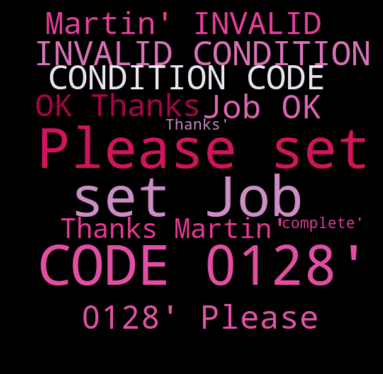

In [30]:
text = df_first[['Resolution', 'Abend_Codes']].values
wordcloud = WordCloud(
    width = 480,
    height = 480,
    max_words=10000,
    colormap="PuRd_r",
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 5),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [32]:
df_second = df_new[df_new['Jobs']=='AZD2IGDR']
df_second

,Jobs,Environment,Date,Time,Abend_Codes,Resolution
36,AZD2IGDR,QSYS,17.06.2019,23:09:09,INVALID CC 0003,restart
174,AZD2IGDR,QSYS,10.05.2019,23:11:10,INVALID CONDITION-CODE 0003,please restart the job
197,AZD2IGDR,QSYS,06.05.2019,23:13:10,INVALID CONDITION-CODE 0003,please restart the job
246,AZD2IGDR,QSYS,30.04.2019,23:11:46,INVALID CONDITION-CODE 0003,restart
302,AZD2IGDR,QSYS,19.04.2019,23:12:47,INVALID CONDITION-CODE 0003,please restartthe job
642,AZD2IGDR,QSYS,07.03.2019,23:11:50,INVALID CONDITION-CODE 0003,Please restart the job
745,AZD2IGDR,QSYS,20.02.2019,23:12:46,INVALID CONDITION-CODE 0003,restart
758,AZD2IGDR,QSYS,14.02.2019,22:57:01,INVALID CONDITION-CODE 0003,restart
777,AZD2IGDR,QSYS,13.02.2019,22:58:07,INVALID CONDITION-CODE 0003,set OK
836,AZD2IGDR,QSYS,05.02.2019,23:10:49,INVALID CONDITION-CODE 0003,resolved


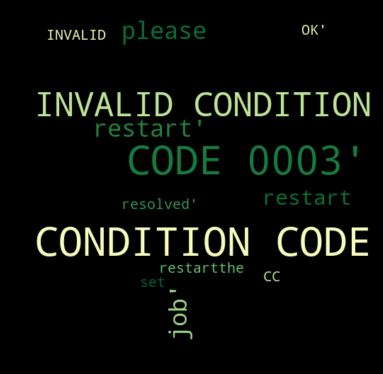

In [33]:
text = df_second[['Resolution', 'Abend_Codes']].values
wordcloud = WordCloud(
    width = 480,
    height = 480,
    max_words=10000,
    colormap="YlGn",
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 5),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [34]:
df_third = df_new[df_new['Jobs']=='§ZAB859B']
df_third

,Jobs,Environment,Date,Time,Abend_Codes,Resolution
23,§ZAB859B,QSYS,22.06.2019,10:00:07,ABEND CODE 0008,1.) RERUN §ZAB859A 2.) Restart the abended job
25,§ZAB859B,QSYS,21.06.2019,19:01:06,ABEND CODE 0008,1. Replan Job §ZAB859A: set a Time dependency ...
136,§ZAB859B,QSYS,24.05.2019,19:01:12,ABEND CODE 0008,1.) Copy TSE to Q1(+1): TSE.XXNX.AB8.STO.DBVLQ...
303,§ZAB859B,QSYS,19.04.2019,22:17:34,JOB FAILED,1. delete: A5.AXXXX.#UMZ11O.LRZ.§ZAB859B A5.AX...
304,§ZAB859B,QSYS,19.04.2019,21:31:19,INVALID CONDITION-CODE 0004,1.) Copy: TSE.XXNX.AB8.QI.DBVLQ.T190531 --> Q1...
305,§ZAB859B,QSYS,19.04.2019,20:58:54,ABEND CODE 0008,1.) Copy: TSE.XXNX.AB8.QI.DBVLQ.T190531 --> Q1...
306,§ZAB859B,QSYS,19.04.2019,19:01:20,ABEND CODE 0008,1.) Copy: TSE.XXNX.AB8.QI.DBVLQ.T190531 --> Q1...
489,§ZAB859B,QSYS,26.03.2019,18:02:27,ABEND CODE 0008,1.) Rerun §ZAB859A 2) Restart the abended job
735,§ZAB859B,QSYS,21.02.2019,19:01:22,ABEND CODE 0008,1. Rerun Job §ZAB859A 2.) Then Restart §ZAB859B
896,§ZAB859B,QSYS,13.12.2018,19:01:26,ABEND CODE 0008,1.) Rerun Job §ZAB859A with the following SORT...


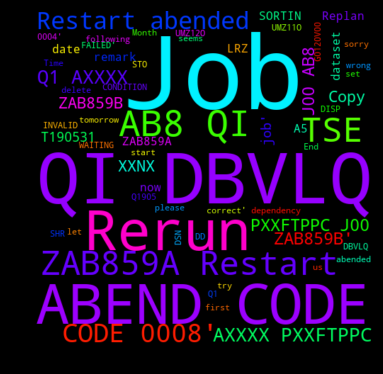

In [35]:
text = df_third[['Resolution', 'Abend_Codes']].values
wordcloud = WordCloud(
    width = 480,
    height = 480,
    max_words=10000,
    colormap="gist_rainbow",
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 5),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [36]:
df_fourth = df_new[df_new['Jobs']=='§ZCZB14B']
df_fourth

,Jobs,Environment,Date,Time,Abend_Codes,Resolution
215,§ZCZB14B,QSYS,04.05.2019,05:00:07,ABEND CODE 0129,PLEASE RESTART JOB
217,§ZCZB14B,QSYS,03.05.2019,05:21:04,ABEND CODE 0129,PLEASE RESTART JOB WITH CHANGE OLD: FORCECOLD=...
219,§ZCZB14B,QSYS,02.05.2019,15:12:29,ABEND CODE 0129,SET JOB COMPLETE
228,§ZCZB14B,QSYS,01.05.2019,05:00:07,ABEND CODE 0129,SET JOB COMPLETE
664,§ZCZB14B,QSYS,05.03.2019,05:00:09,ABEND CODE 0129,PLEASE SET JOB COMPLETE
746,§ZCZB14B,QSYS,20.02.2019,22:04:33,ABEND CODE 1770,SET JOB COMPLETE
757,§ZCZB14B,QSYS,14.02.2019,23:00:44,ABEND CODE 1770,SET JOB COMPLETE
762,§ZCZB14B,QSYS,14.02.2019,14:35:41,ABEND CODE 0129,PLEASE SET JOB COMPLETE
920,§ZCZB14B,QSYS,07.12.2018,02:26:52,ABEND CODE 1770,Please restart the job §ZCZB14B Many Thanks in...
935,§ZCZB14B,QSYS,04.12.2018,08:04:33,ABEND CODE 0129,please set job complete


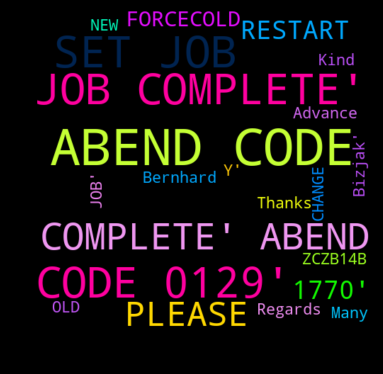

In [37]:
text = df_fourth[['Resolution', 'Abend_Codes']].values
wordcloud = WordCloud(
    width = 480,
    height = 480,
    max_words=10000,
    colormap="gist_ncar",
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 5),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [38]:
df_fifth = df_new[df_new['Jobs']=='§ZACD80A']
df_fifth

,Jobs,Environment,Date,Time,Abend_Codes,Resolution
409,§ZACD80A,QSYS,01.04.2019,13:11:44,ABEND CODE S80A,Please set the job to complete!
411,§ZACD80A,QSYS,01.04.2019,10:28:20,ABEND CODE S222,Please restart the job!
439,§ZACD80A,QSYS,28.03.2019,16:08:15,INVALID CONDITION-CODE 0008,Please set the job to complete!
473,§ZACD80A,QSYS,27.03.2019,07:23:50,INVALID CONDITION-CODE 0008,Please restart the job with following changes:...
522,§ZACD80A,QSYS,20.03.2019,10:27:54,INVALID CONDITION-CODE 0008,Please set the job to Complete!
529,§ZACD80A,QSYS,19.03.2019,07:25:39,INVALID CONDITION-CODE 0008,Please restart the job!
535,§ZACD80A,QSYS,18.03.2019,15:37:52,INVALID CONDITION-CODE 0008,Please restart the job!
536,§ZACD80A,QSYS,18.03.2019,12:45:34,INVALID CONDITION-CODE 0008,Please restart the job!
537,§ZACD80A,QSYS,18.03.2019,13:31:13,INVALID CONDITION-CODE 0008,Please restart the job!


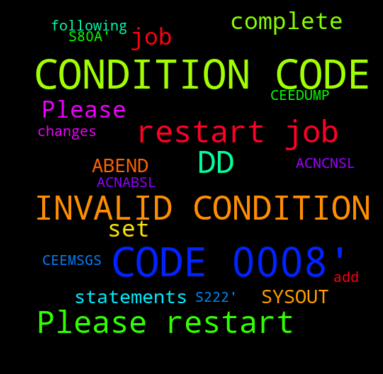

In [39]:
text = df_fifth[['Resolution', 'Abend_Codes']].values
wordcloud = WordCloud(
    width = 480,
    height = 480,
    max_words=10000,
    colormap="gist_rainbow",
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 5),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()